# Глубинное обучение 1 / Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 1. Часть 2: полносвязные нейронные сети. 

### Общая информация

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{\text{penalty}} = M_{\text{full}} \cdot 0.85^{t/1440}$, где $M_{\text{full}}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать через четыре дня после мягкого дедлайна, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этой части мы будем использовать фреймворк для обучения нейронный сетей, который вы реализовали в первой половине задания. А именно, вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html). Если по какой-то причине вы не сделали первую половину домашки, то **можете поставить все эксперименты на PyTorch**, но рекомендуется использовать ваши реализации модулей. 

In [113]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from IPython.display import clear_output

plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [1]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2022-10-18 22:45:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 211011981 (201M) [application/x-httpd-php]
Сохранение в: «data.txt.zip»

data.txt.zip        100%[===================>] 201,24M  3,62MB/s    за 69s     

2022-10-18 22:47:03 (2,90 MB/s) - «data.txt.zip» сохранён [211011981/211011981]



In [115]:
df = pd.read_csv('data.txt.zip', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Посмотрим на статистики по данным.

In [116]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

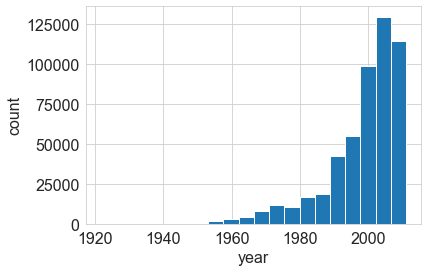

Range: 1922 - 2011
Unique values: 89


In [117]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [118]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [119]:
from statistics import mode
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train, y_train)
print(f"Ridge: {mean_squared_error(y_test, model.predict(X_test))}")

mean_value = y_train.mean()
print(f"Best constant model: {mean_squared_error(y_test, np.full(y_test.shape, mean_value))}")

Ridge: 89.74966397222076
Best constant model: 117.62580230734426


Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты.

In [121]:
DEVICE = torch.device('mps:0')
# DEVICE = torch.device('cude:0')
# DEVICE = None

In [122]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    '''
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    '''
    if torch.is_tensor(train_losses[0]):
        train_losses = [loss.detach().numpy() for loss in train_losses]
        val_losses = [loss.detach().numpy() for loss in val_losses]
    if torch.is_tensor(train_metrics[0]):
        train_metrics = [metric.detach().numpy() for metric in train_metrics]
        val_metrics = [metric.detach().numpy() for metric in val_metrics]

    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='val')

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale('log')

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale('log')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('MSE')
    plt.show()


def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader,
                       num_epochs, verbose=True, device=None):
    '''
    Train and validate neural network
      - model: neural network (mm.Module) to train
      - optimizer: optimizer (mm.Optimizer) chained to a model
      - criterion: loss function class (mm.Criterion)
      - metrics: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: mm.DataLoader with train set
      - val_loader: mm.DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
      - device: gpu device
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    '''
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
            
        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            loss.backward()
            optimizer.step()
            
            metric_value = metric(predictions, y_batch)
            running_loss += loss * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]

        train_losses += [running_loss / len(train_loader.dataset)]
        train_metrics += [running_metric / len(train_loader.dataset)]

        model.eval()
        running_loss, running_metric = 0, 0

        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            with torch.no_grad():
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)

            metric_value = metric(predictions, y_batch)
            running_loss += loss * X_batch.shape[0]
            running_metric += metric_value * X_batch.shape[0]

        val_losses += [running_loss / len(val_loader.dataset)]
        val_metrics += [running_metric / len(val_loader.dataset)]

    
    if verbose:
        plot_losses(train_losses, train_metrics, val_losses, val_metrics)
    
    return train_metrics[-1].item(), val_metrics[-1].item()


def get_metric_test(model, metric, test_loader):
    test_metric = 0
    model.eval()
    for X_batch, y_batch in test_loader:
        with torch.no_grad():
            predictions = model(X_batch)
        metric_value = metric(predictions, y_batch)
        test_metric += metric_value * X_batch.shape[0]

    return (test_metric / len(test_loader.dataset)).item()

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию.

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-3`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в DataLoader, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением логита).

In [170]:
from sklearn.preprocessing import LabelEncoder
from torch import nn
from torch.utils.data import DataLoader, Dataset


BATCH_SIZE = 48
DIM_IN = X_train.shape[1]
DIN_HIDDEN = 128
DIM_OUT = len(np.unique(y))
NUM_EPOCHS = 4


class MusicDataset(torch.utils.data.Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray, num_classes: int, le: LabelEncoder):
        self.X = torch.from_numpy(X).to(torch.float32)

        y = le.transform(y)
        y = torch.from_numpy(y)
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [171]:
le = LabelEncoder()
le.fit(y)

train_loader = DataLoader(MusicDataset(X_train, y_train, DIM_OUT, le), batch_size=BATCH_SIZE)
test_loader = DataLoader(MusicDataset(X_test, y_test, DIM_OUT, le), batch_size=BATCH_SIZE)
val_loader = DataLoader(MusicDataset(X_val, y_val, DIM_OUT, le), batch_size=BATCH_SIZE)

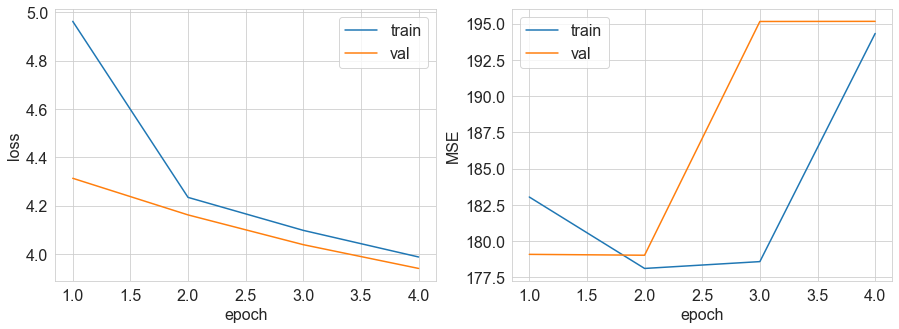

train_metric=194.32965087890625
val_metric=195.16590881347656
test_metric=190.58999633789062


In [172]:
model = nn.Sequential(
    nn.Linear(DIM_IN, DIN_HIDDEN),
    nn.ReLU(),
    nn.Linear(DIN_HIDDEN, DIM_OUT),
)

lr = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

loss_fn = nn.CrossEntropyLoss()
metric = lambda y_pred, y_true: nn.MSELoss()(torch.max(y_pred, 1).indices.to(torch.float32), y_true.to(torch.float32))


train_metric, val_metric = train_and_validate(
    model,
    optimizer,
    loss_fn,
    metric,
    train_loader,
    val_loader,
    NUM_EPOCHS,
    verbose=True
)
test_metric = get_metric_test(model, metric, test_loader)
print(f'{train_metric=}\n{val_metric=}\n{test_metric=}')

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** Нам пришлось обучать нейронку с `CrossEntropyLoss` в качестве функции потерь. Но минимизируя ее, мы не мизировали `MSE`, из-за чего ошибка только росла

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на MSE.

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в DataLoader, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [270]:
class MusicDataset(torch.utils.data.Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray, num_classes: int, le: LabelEncoder = None):
        self.X = torch.from_numpy(X).type(torch.float32)

        y = torch.from_numpy(y).to(torch.float32)
        self.y = y.reshape(-1, 1)

    def __len__(self):
        return self.X.shape[0]

    def  __getitem__(self, index):
        return self.X[index], self.y[index]

In [271]:
BATCH_SIZE = 48
DIM_IN = X_train.shape[1]
DIN_HIDDEN = 128
DIM_OUT = 1
NUM_EPOCHS = 4

train_loader = DataLoader(MusicDataset(X_train, y_train, DIM_OUT), batch_size=BATCH_SIZE)
test_loader = DataLoader(MusicDataset(X_test, y_test, DIM_OUT), batch_size=BATCH_SIZE)
val_loader = DataLoader(MusicDataset(X_val, y_val, DIM_OUT), batch_size=BATCH_SIZE)

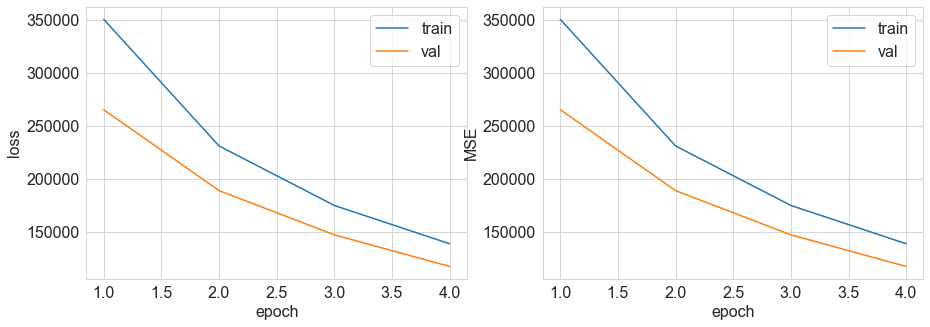

train_metric=138758.25
val_metric=117373.296875
test_metric=117693.3046875


In [275]:
model = nn.Sequential(
    nn.Linear(DIM_IN, DIN_HIDDEN),
    nn.ReLU(),
    nn.Linear(DIN_HIDDEN, DIM_OUT),
)

lr = 1e-8
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

loss_fn = nn.MSELoss()
metric = lambda y_pred, y_true: nn.MSELoss()(y_pred, y_true)

train_metric, val_metric = train_and_validate(
    model,
    optimizer,
    loss_fn,
    metric,
    train_loader,
    val_loader,
    NUM_EPOCHS,
    verbose=True
)
test_metric = get_metric_test(model, metric, test_loader)
print(f'{train_metric=}\n{val_metric=}\n{test_metric=}')


**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

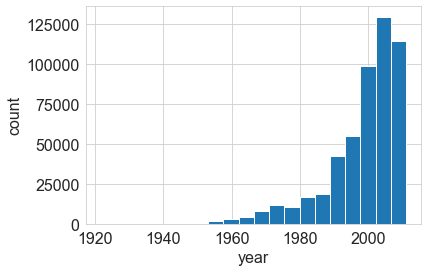

In [176]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()


**Ответ:** Здесь наша нейронка вообще отказалась учиться, даже сильно уменьшив `lr`. Это связано с тем, что у нас несбалансированные классы. 

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [177]:
MIN = torch.min(torch.tensor(y_train), dim=0, keepdim=True).values[0]
MAX = torch.max(torch.tensor(y_train), dim=0, keepdim=True).values[0]

def normalize(sample):
    '''
    Min-max normalization to convert sample to [0, 1] range
    '''
    if not torch.is_tensor(sample):
        sample = torch.tensor(sample).to(torch.float32)
    return (sample - MIN) / (MAX - MIN)

def denormalize(sample):
    '''
    Denormalize sample from [0, 1] to initial range
    '''
    if not torch.is_tensor(sample):
        sample = torch.tensor(sample).to(torch.float32)
    return  torch.round(sample * (MAX - MIN) + MIN)


Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим сигмоидную активацию после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений. 

In [178]:
class MusicDataset(torch.utils.data.Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray, num_classes: int, le: LabelEncoder = None):
        self.X = torch.from_numpy(X).type(torch.float32)

        y = y.reshape(-1, 1)
        self.y = normalize(y)

    def __len__(self):
        return self.X.shape[0]

    def  __getitem__(self, index):
        return self.X[index], self.y[index]

In [179]:
BATCH_SIZE = 48
DIM_IN = X_train.shape[1]
DIN_HIDDEN = 128
DIM_OUT = 1
NUM_EPOCHS = 4

train_loader = DataLoader(MusicDataset(X_train, y_train, DIM_OUT), batch_size=BATCH_SIZE)
test_loader = DataLoader(MusicDataset(X_test, y_test, DIM_OUT), batch_size=BATCH_SIZE)
val_loader = DataLoader(MusicDataset(X_val, y_val, DIM_OUT), batch_size=BATCH_SIZE)

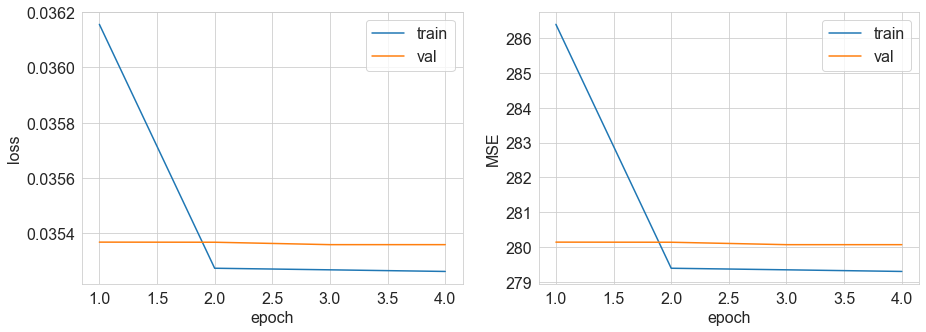

train_metric=279.2994384765625
val_metric=280.0685119628906
test_metric=274.86590576171875


In [180]:
model = nn.Sequential(
    nn.Linear(DIM_IN, DIN_HIDDEN),
    nn.ReLU(),
    nn.Linear(DIN_HIDDEN, DIM_OUT),
    nn.Sigmoid()
)

lr = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

loss_fn = nn.MSELoss()
metric = lambda y_pred, y_true: nn.MSELoss()(denormalize(y_pred), denormalize(y_true))

train_metric, val_metric = train_and_validate(
    model,
    optimizer,
    loss_fn,
    metric,
    train_loader,
    val_loader,
    NUM_EPOCHS,
    verbose=True
)
test_metric = get_metric_test(model, metric, test_loader)
print(f'{train_metric=}\n{val_metric=}\n{test_metric=}')

**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском. 

**Ответ:** Теперь наша нейронка хотя бы начала обучаться, но все равно она сильно уступает нашему бэйзлайну. При этом мы можем заметить, что начиная со второй эпохи, модель перестает обучаться и показывает константную ошибку.

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [276]:
from sklearn.preprocessing import StandardScaler

class MusicDataset(torch.utils.data.Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray, num_classes: int, le: LabelEncoder = None):
        X = StandardScaler().fit_transform(X)
        self.X = torch.from_numpy(X).type(torch.float32)

        y = y.reshape(-1, 1)
        self.y = normalize(y)

    def __len__(self):
        return self.X.shape[0]

    def  __getitem__(self, index):
        return self.X[index], self.y[index]


train_loader = DataLoader(MusicDataset(X_train, y_train, DIM_OUT), batch_size=BATCH_SIZE)
test_loader = DataLoader(MusicDataset(X_test, y_test, DIM_OUT), batch_size=BATCH_SIZE)
val_loader = DataLoader(MusicDataset(X_val, y_val, DIM_OUT), batch_size=BATCH_SIZE)

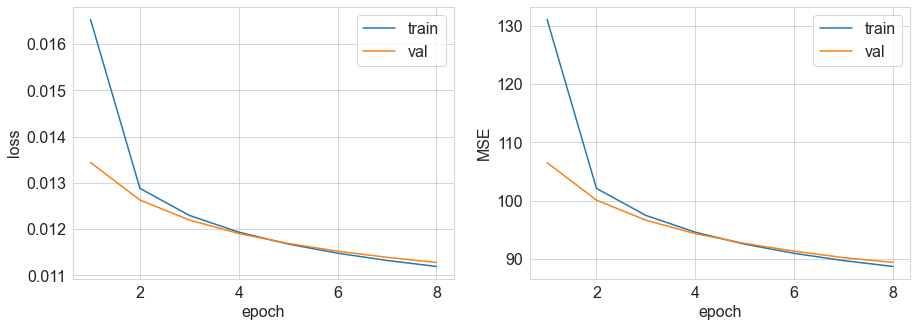

train_metric=88.75880432128906
val_metric=89.44422149658203
test_metric=87.0138931274414


In [279]:
BATCH_SIZE = 48
DIM_IN = X_train.shape[1]
DIN_HIDDEN = 128
DIM_OUT = 1
NUM_EPOCHS = 8

model = nn.Sequential(
    nn.Linear(DIM_IN, DIN_HIDDEN),
    nn.ReLU(),
    nn.Linear(DIN_HIDDEN, DIM_OUT),
    nn.Sigmoid()
)

lr = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

loss_fn = nn.MSELoss()
metric = lambda y_pred, y_true: nn.MSELoss()(denormalize(y_pred), denormalize(y_true))

train_metric, val_metric = train_and_validate(
    model,
    optimizer,
    loss_fn,
    metric,
    train_loader,
    val_loader,
    NUM_EPOCHS,
    verbose=True
)
test_metric = get_metric_test(model, metric, test_loader)
print(f'{train_metric=}\n{val_metric=}\n{test_metric=}')

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества.

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

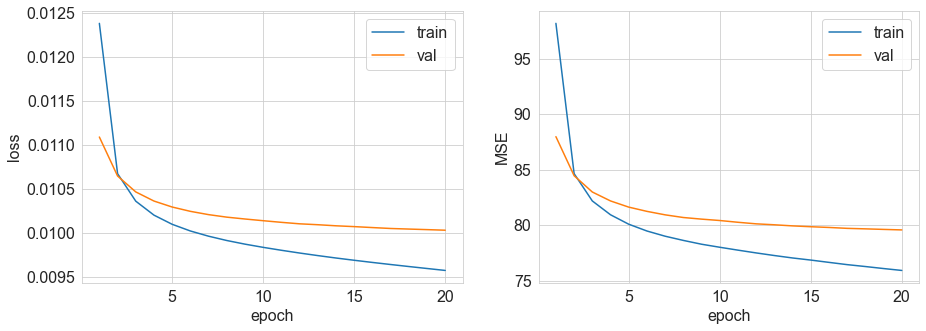

train_metric=75.93020629882812
val_metric=79.5766372680664
test_metric=78.16719818115234


In [194]:
BATCH_SIZE = 48
DIM_IN = X_train.shape[1]
DIN_HIDDEN = 128
DIM_OUT = 1
NUM_EPOCHS = 20

model = nn.Sequential(
    nn.Linear(DIM_IN, DIN_HIDDEN),
    nn.ReLU(),
    nn.Linear(DIN_HIDDEN, DIM_OUT),
    nn.Sigmoid()
)

lr = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

loss_fn = nn.MSELoss()
metric = lambda y_pred, y_true: nn.MSELoss()(denormalize(y_pred), denormalize(y_true))

train_metric, val_metric = train_and_validate(
    model,
    optimizer,
    loss_fn,
    metric,
    train_loader,
    val_loader,
    NUM_EPOCHS,
    verbose=True
)
test_metric = get_metric_test(model, metric, test_loader)
print(f'{train_metric=}\n{val_metric=}\n{test_metric=}')

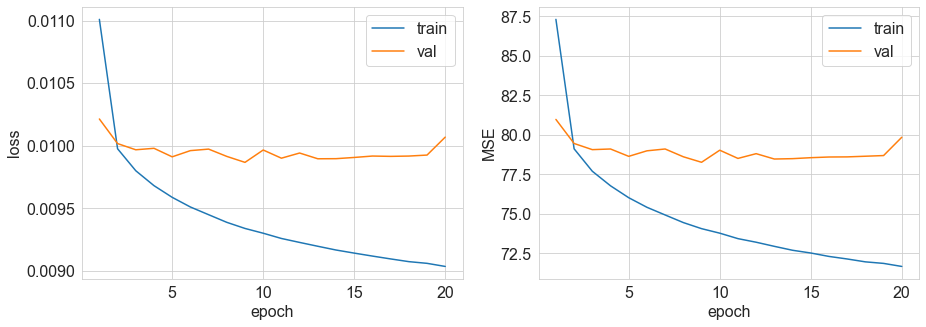

train_metric=71.66785430908203
val_metric=79.84937286376953
test_metric=79.99707794189453


In [195]:
BATCH_SIZE = 48
DIM_IN = X_train.shape[1]
DIN_HIDDEN = 128
DIM_OUT = 1
NUM_EPOCHS = 20

model = nn.Sequential(
    nn.Linear(DIM_IN, DIN_HIDDEN),
    nn.ReLU(),
    nn.Linear(DIN_HIDDEN, DIM_OUT),
    nn.Sigmoid()
)

lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_fn = nn.MSELoss()
metric = lambda y_pred, y_true: nn.MSELoss()(denormalize(y_pred), denormalize(y_true))

train_metric, val_metric = train_and_validate(
    model,
    optimizer,
    loss_fn,
    metric,
    train_loader,
    val_loader,
    NUM_EPOCHS,
    verbose=True,
)
test_metric = get_metric_test(model, metric, test_loader)
print(f'{train_metric=}\n{val_metric=}\n{test_metric=}')

(я поставил побольше эпох, чтобы посмотреть, до какого момента будет уменьшаться ошибка на валидационной )

Для `SGD+momentum` c `lr=1e-2` и `momentum=0.9` ошибка и на валидационной выборке, и на обучающей выборке выше, чем для `Adam` с `lr=1e-3`. В дальнейшем будем использовать `Adam` с `lr=1e-3`.

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

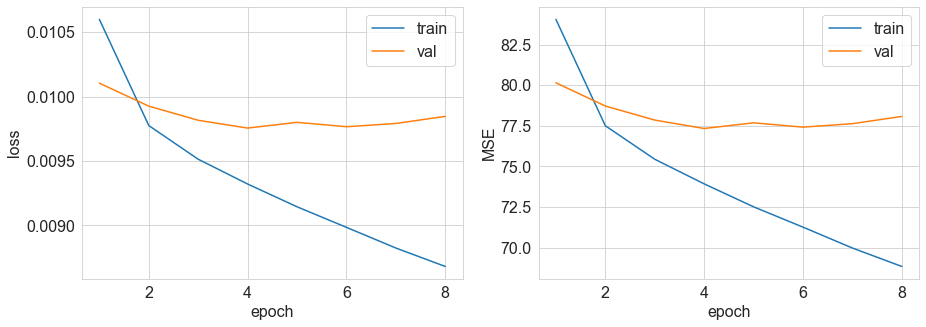

train_metric=68.8422622680664
val_metric=78.07730865478516
test_metric=79.00352478027344


In [193]:
BATCH_SIZE = 48
DIM_IN = X_train.shape[1]
DIN_HIDDEN = 128
DIM_OUT = 1
NUM_EPOCHS = 8

model = nn.Sequential(
    nn.Linear(DIM_IN, DIN_HIDDEN),
    nn.ReLU(),
    nn.Linear(DIN_HIDDEN, DIN_HIDDEN),
    nn.ReLU(),
    nn.Linear(DIN_HIDDEN, DIM_OUT),
    nn.Sigmoid()
)

lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_fn = nn.MSELoss()
metric = lambda y_pred, y_true: nn.MSELoss()(denormalize(y_pred), denormalize(y_true))

train_metric, val_metric = train_and_validate(
    model,
    optimizer,
    loss_fn,
    metric,
    train_loader,
    val_loader,
    NUM_EPOCHS,
    verbose=True
)
test_metric = get_metric_test(model, metric, test_loader)
print(f'{train_metric=}\n{val_metric=}\n{test_metric=}')

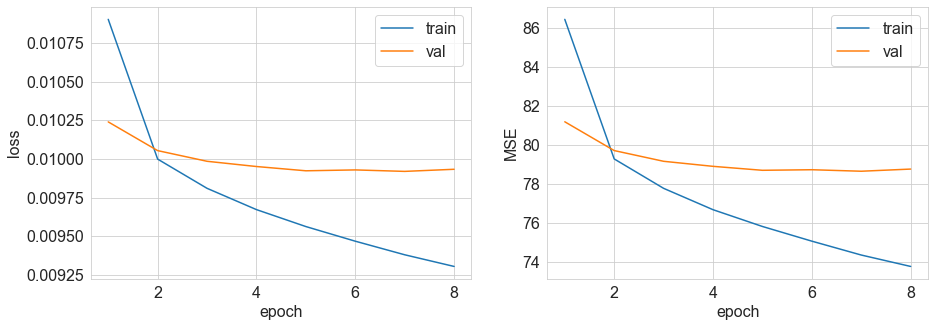

train_metric=73.78771209716797
val_metric=78.77014923095703
test_metric=78.75642395019531


In [196]:
BATCH_SIZE = 64
DIM_IN = X_train.shape[1]
DIN_HIDDEN = 256
DIM_OUT = 1
NUM_EPOCHS = 8

model = nn.Sequential(
    nn.Linear(DIM_IN, DIN_HIDDEN),
    nn.ReLU(),
    nn.Linear(DIN_HIDDEN, DIM_OUT),
    nn.Sigmoid()
)

lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_fn = nn.MSELoss()
metric = lambda y_pred, y_true: nn.MSELoss()(denormalize(y_pred), denormalize(y_true))

train_metric, val_metric = train_and_validate(
    model,
    optimizer,
    loss_fn,
    metric,
    train_loader,
    val_loader,
    NUM_EPOCHS,
    verbose=True
)
test_metric = get_metric_test(model, metric, test_loader)
print(f'{train_metric=}\n{val_metric=}\n{test_metric=}')

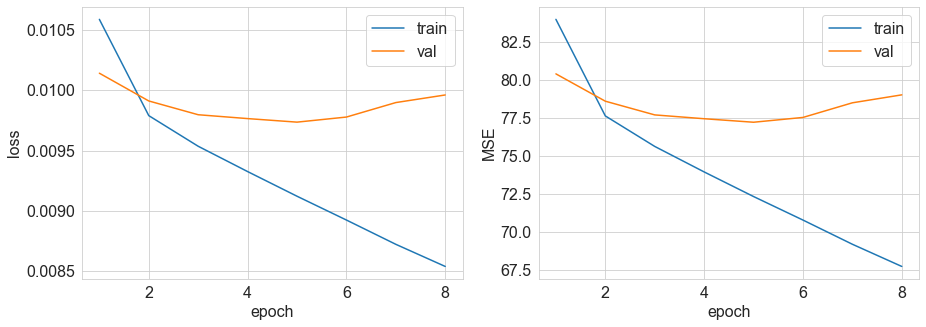

train_metric=67.71118927001953
val_metric=79.00525665283203
test_metric=80.12675476074219


In [197]:
BATCH_SIZE = 64
DIM_IN = X_train.shape[1]
DIM_OUT = 1
NUM_EPOCHS = 8

model = nn.Sequential(
    nn.Linear(DIM_IN, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, DIM_OUT),
    nn.Sigmoid()
)

lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_fn = nn.MSELoss()
metric = lambda y_pred, y_true: nn.MSELoss()(denormalize(y_pred), denormalize(y_true))

train_metric, val_metric = train_and_validate(
    model,
    optimizer,
    loss_fn,
    metric,
    train_loader,
    val_loader,
    NUM_EPOCHS,
    verbose=True
)
test_metric = get_metric_test(model, metric, test_loader)
print(f'{train_metric=}\n{val_metric=}\n{test_metric=}')

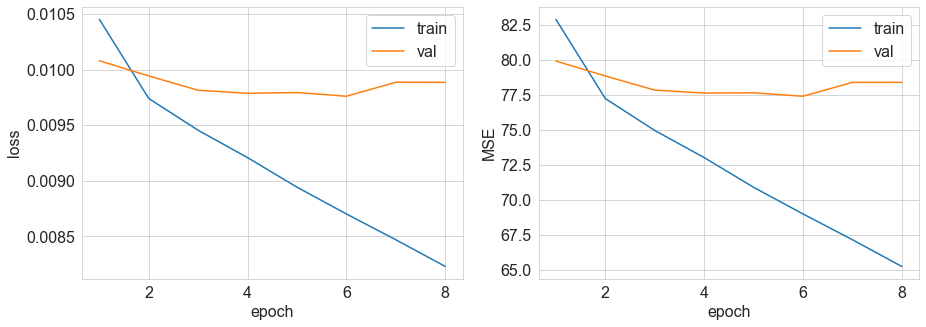

train_metric=65.26590728759766
val_metric=78.39387512207031
test_metric=79.80279541015625


In [198]:
BATCH_SIZE = 64
DIM_IN = X_train.shape[1]
DIM_OUT = 1
NUM_EPOCHS = 8

model = nn.Sequential(
    nn.Linear(DIM_IN, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, DIM_OUT),
    nn.Sigmoid()
)

lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_fn = nn.MSELoss()
metric = lambda y_pred, y_true: nn.MSELoss()(denormalize(y_pred), denormalize(y_true))

train_metric, val_metric = train_and_validate(
    model,
    optimizer,
    loss_fn,
    metric,
    train_loader,
    val_loader,
    NUM_EPOCHS,
    verbose=True
)
test_metric = get_metric_test(model, metric, test_loader)
print(f'{train_metric=}\n{val_metric=}\n{test_metric=}')

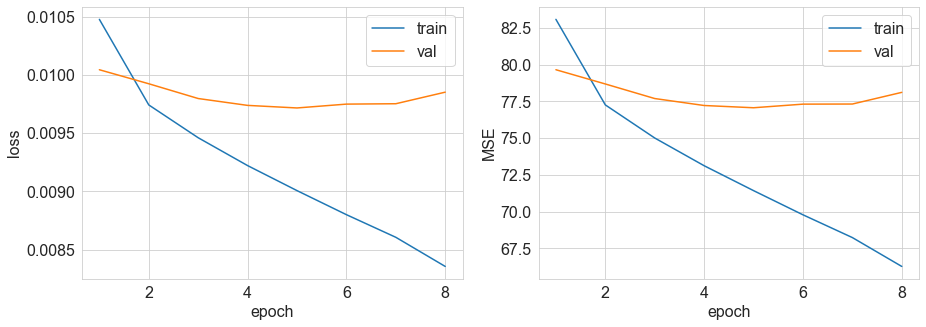

train_metric=66.27351379394531
val_metric=78.12051391601562
test_metric=79.7315902709961


In [200]:
BATCH_SIZE = 64
DIM_IN = X_train.shape[1]
DIM_OUT = 1
NUM_EPOCHS = 8

model = nn.Sequential(
    nn.Linear(DIM_IN, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, DIM_OUT),
    nn.Sigmoid()
)

lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_fn = nn.MSELoss()
metric = lambda y_pred, y_true: nn.MSELoss()(denormalize(y_pred), denormalize(y_true))

train_metric, val_metric = train_and_validate(
    model,
    optimizer,
    loss_fn,
    metric,
    train_loader,
    val_loader,
    NUM_EPOCHS,
    verbose=True
)
test_metric = get_metric_test(model, metric, test_loader)
print(f'{train_metric=}\n{val_metric=}\n{test_metric=}')

**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем разные методы регуляризации, чтобы бороться с переобучением. Проведите два эксперимента:

- Добавьте слой дропаута с параметром $p=0.2$ после каждого линейного слоя, кроме последнего.
- Попробуйте batch-нормализацию вместо дропаута. Строго говоря, batch-нормализация не является методом регуляризации, но никто не запрещает нам экспериментировать с ней.

Опишите результаты экспериментов. 

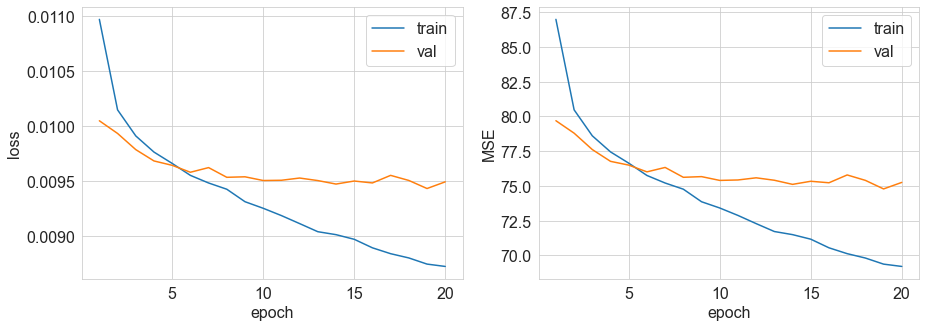

train_metric=69.195068359375
val_metric=75.24612426757812
test_metric=76.93501281738281


In [210]:
BATCH_SIZE = 48
DIM_IN = X_train.shape[1]
DIM_OUT = 1
NUM_EPOCHS = 20

model = nn.Sequential(
    nn.Linear(DIM_IN, 256),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(128, DIM_OUT),
    nn.Sigmoid()
)

lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_fn = nn.MSELoss()
metric = lambda y_pred, y_true: nn.MSELoss()(denormalize(y_pred), denormalize(y_true))

train_metric, val_metric = train_and_validate(
    model,
    optimizer,
    loss_fn,
    metric,
    train_loader,
    val_loader,
    NUM_EPOCHS,
    verbose=True
)
test_metric = get_metric_test(model, metric, test_loader)
print(f'{train_metric=}\n{val_metric=}\n{test_metric=}')

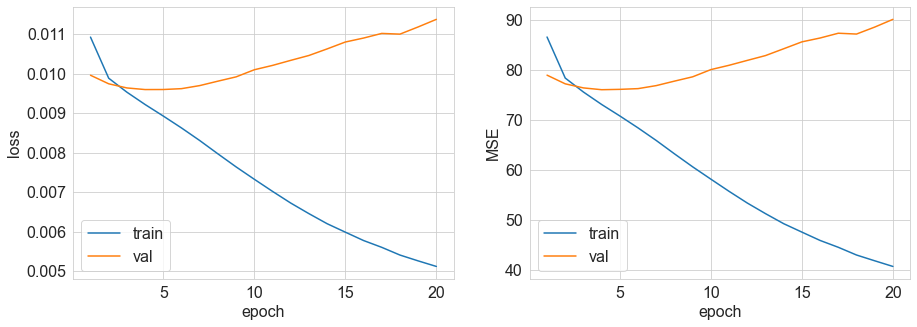

train_metric=40.63718032836914
val_metric=90.14535522460938
test_metric=93.67086029052734


In [211]:
BATCH_SIZE = 48
DIM_IN = X_train.shape[1]
DIM_OUT = 1
NUM_EPOCHS = 20

model = nn.Sequential(
    nn.Linear(DIM_IN, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.BatchNorm1d(256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.Linear(128, DIM_OUT),
    nn.Sigmoid()
)

lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

loss_fn = nn.MSELoss()
metric = lambda y_pred, y_true: nn.MSELoss()(denormalize(y_pred), denormalize(y_true))

train_metric, val_metric = train_and_validate(
    model,
    optimizer,
    loss_fn,
    metric,
    train_loader,
    val_loader,
    NUM_EPOCHS,
    verbose=True
)
test_metric = get_metric_test(model, metric, test_loader)
print(f'{train_metric=}\n{val_metric=}\n{test_metric=}')

`Dropout` лучше работает для снижения переобучения (для него `MSE` на валидационной выборке ниже). При использовании `Dropout` уменьшилась разница между метриками на обучающей и на валидационной выборке, причем на валидационной выборке ошибка уменьшилась (исправилсь проблема переобучения)

Остановимся на `8` эпохах, дальше происходит переобучение.

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`. Затем подберите оптимальное значение weight decay для данного lr (тоже по логарифмической сетке, типичные значения этого параметра лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку). Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [246]:
BATCH_SIZE = 48
DIM_IN = X_train.shape[1]
DIM_OUT = 1
NUM_EPOCHS = 8

model = nn.Sequential(
    nn.Linear(DIM_IN, 256),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(128, DIM_OUT),
    nn.Sigmoid()
)

loss_fn = nn.MSELoss()
metric = lambda y_pred, y_true: nn.MSELoss()(denormalize(y_pred), denormalize(y_true))

lrs = np.logspace(-5, 0, 6)
results_lr = {}
for lr in lrs:
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    results_lr[lr] = train_and_validate(
        model,
        optimizer,
        loss_fn,
        metric,
        train_loader,
        val_loader,
        NUM_EPOCHS,
        verbose=False
    )

In [268]:
# сторока 0 -- train metric
# сторока 1 -- val metric

results_lr_df = pd.DataFrame.from_dict(results_lr)
results_lr_df

,0.00001,0.00010,0.00100,0.01000,0.10000,1.00000
0,85.000580,73.767960,73.118813,94.519905,120.703789,4794.794434
1,81.984787,75.559708,75.327286,88.490646,121.219772,5954.966797


Лучший `lr=1e-4`. Для этого значения ошибка на валидационной выборке меньше всего

Теперь подберем `weight decay`:

In [249]:
BATCH_SIZE = 48
DIM_IN = X_train.shape[1]
DIM_OUT = 1
NUM_EPOCHS = 8

model = nn.Sequential(
    nn.Linear(DIM_IN, 256),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(128, DIM_OUT),
    nn.Sigmoid()
)

loss_fn = nn.MSELoss()
metric = lambda y_pred, y_true: nn.MSELoss()(denormalize(y_pred), denormalize(y_true))

wds = [0] + list(np.logspace(-6, -3, 4))
results_wd = {}
for wd in wds:
    lr=1e-4
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    results_wd[wd] = train_and_validate(
        model,
        optimizer,
        loss_fn,
        metric,
        train_loader,
        val_loader,
        NUM_EPOCHS,
        verbose=False
    )

In [269]:
# сторока 0 -- train metric
# сторока 1 -- val metric

results_wd_df = pd.DataFrame.from_dict(results_wd)
results_wd_df

,0.000000,0.000001,0.000010,0.000100,0.001000
0,74.683746,69.176277,66.778488,74.470833,83.929100
1,75.358047,74.999733,75.031067,75.952179,83.673424


Лучший `weight decay=1e-06`. Для этого значения ошибка на валидационной выборке меньше всего

Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это. 

In [234]:
BATCH_SIZE = 48
DIM_IN = X_train.shape[1]
DIM_OUT = 1
NUM_EPOCHS = 8

model = nn.Sequential(
    nn.Linear(DIM_IN, 256),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.Dropout(p=0.2),
    nn.ReLU(),
    nn.Linear(128, DIM_OUT),
    nn.Sigmoid()
)

data_loader = DataLoader(MusicDataset(X, y, DIM_OUT), batch_size=BATCH_SIZE)

lr=1e-4
wd=1e-6
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
loss_fn = nn.MSELoss()

for _ in range(NUM_EPOCHS):
        model.train()
        for X_batch, y_batch in data_loader:
            optimizer.zero_grad()
            predictions = model(X_batch)
            loss = loss_fn(predictions, y_batch)
            loss.backward()
            optimizer.step()

test_metric = get_metric_test(model, metric, test_loader)

In [236]:
test_metric

70.18303680419922

Получили, что ошибка на тесте всего `70.1830`. Линейная регрессия нам дала `MSE=89`. Я думаю, что можно еще улучшить нейронную сеть, сделав больше экспериментов